In [333]:
import json
import glob
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def synthetic_preprocess(language,id):
    data_path = '/data/ephemeral/home/code/data/'
    json_path = data_path + language +'_receipt/ufo/' + 'train' + '.json'
    image_files = glob.glob(data_path + language +'_receipt/img/' + 'train' + '/*.jpg')

    img = cv2.imread(image_files[id])
    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    image_name = image_files[id].split('/')[-1]
    points_list = []
    for word in jf['images'][image_name]['words'].keys():
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)

    x_lim = np.clip(np.array(points_list).reshape(-1,2)[:,0],a_min=0,a_max=img.shape[1])
    y_lim = np.clip(np.array(points_list).reshape(-1,2)[:,1],a_min=0,a_max=img.shape[0])

    xy_lim = np.stack([x_lim,y_lim],axis=1)
    poly_list = xy_lim.reshape(-1,4,2)

    x2 = xy_lim.max(axis=0)[0]
    y2 = xy_lim.max(axis=0)[1]
    x1 = xy_lim.min(axis=0)[0]
    y1 = xy_lim.min(axis=0)[1]

    image_json = jf['images'][image_name]
    return img, poly_list, [x1,y1,x2,y2], image_json

img_background = synthetic_preprocess(language='chinese', id=1)

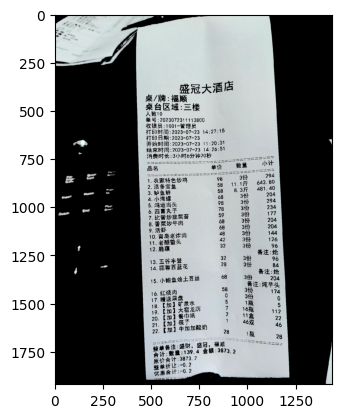

In [76]:
plt.imshow(cv2.bitwise_and(image, image, mask=hsv_mask))

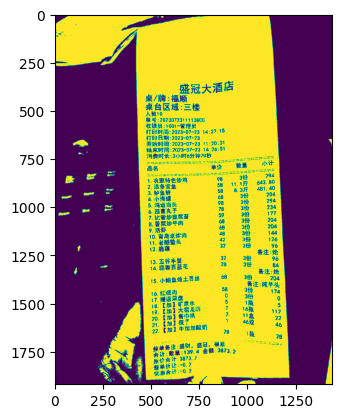

In [188]:
plt.imshow(hsv_mask)

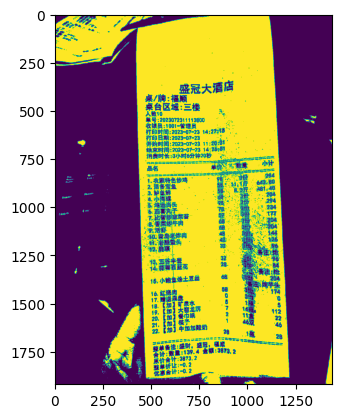

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
gray_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
hsvLower = np.array([0,0,200])    # 추출할 색의 하한(HSV)
hsvUpper = np.array([255,255,255])    # 추출할 색의 상한(HSV)
hsv_mask = cv2.inRange(gray_image, hsvLower, hsvUpper)
gray_image = cv2.bitwise_and(gray_image, gray_image, mask=hsv_mask)
gray_image = cv2.threshold(hsv_mask,  250, 255, cv2.THRESH_BINARY)[1]
plt.imshow(gray_image, cmap )

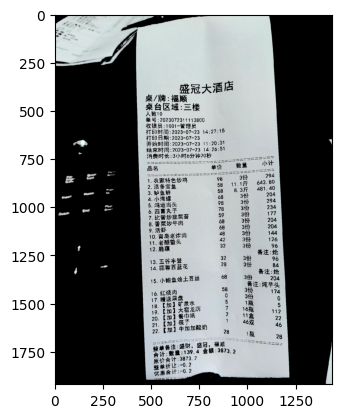

In [103]:
import cv2
import numpy as np

image = cv2.imread('/data/ephemeral/home/code/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000054_page0001.jpg') # 이미지 파일 읽어들이기

# HSV로 색 추출
hsvLower = np.array([150, 150, 150])    # 추출할 색의 하한(HSV)
hsvUpper = np.array([255, 255, 255])    # 추출할 색의 상한(HSV)
hsv_mask = cv2.inRange(image, hsvLower, hsvUpper)    # HSV에서 마스크를 작성
#image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 이미지를 HSV으로 변환

result = cv2.bitwise_and(image, image, mask=hsv_mask) # 원래 이미지와 마스크를 합성
plt.imshow(result)


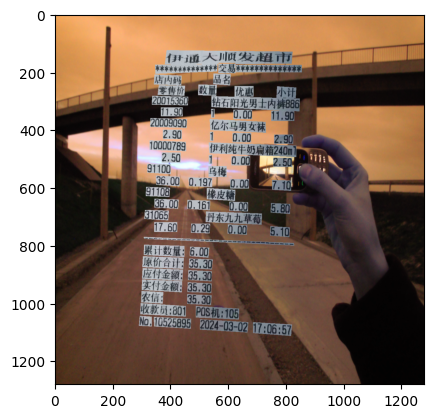

In [179]:
img1, points_list1, receipt_point1, json1 = img_background

background_image = cv2.imread('/data/ephemeral/home/Image_created_with_a_mobile_phone.png')
background_image = cv2.resize(background_image,(img1.shape[1],img1.shape[0]))
mask = np.zeros(img1.shape[:2])
img_mask = cv2.fillPoly(mask,np.int32(points_list1),1)
img_masks = img1 * np.expand_dims(img_mask,axis=-1) + background_image* (np.expand_dims(1-img_mask,axis=-1))
plt.imshow(img_masks.astype('uint8'))

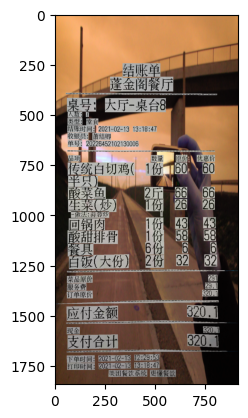

In [180]:
img_document = synthetic_preprocess(language='chinese', id=2)

img2, points_list2, receipt_point2, json2 = img_document

background_image = cv2.imread('/data/ephemeral/home/Image_created_with_a_mobile_phone.png')
background_image = cv2.resize(background_image,(img2.shape[1],img2.shape[0]))
mask = np.zeros_like(img2[:,:,0])
img_mask = cv2.fillPoly(mask,np.int32(points_list2),1)
img_masks = img2 * np.expand_dims(img_mask,axis=-1) + background_image* (np.expand_dims(1-img_mask,axis=-1))
plt.imshow(img_masks.astype('uint8'))

In [261]:
def synthetic_preprocess(img_file, json_file):
    img = cv2.imread(img_file)
    image_name = img_file.split('/')[-1]
    points_list = []
    for word in json_file['images'][image_name]['words'].keys():
        points = json_file['images'][image_name]['words'][word]['points']
        points_list.append(points)

    x_lim = np.clip(np.array(points_list).reshape(-1,2)[:,0],a_min=0,a_max=img.shape[1])
    y_lim = np.clip(np.array(points_list).reshape(-1,2)[:,1],a_min=0,a_max=img.shape[0])

    xy_lim = np.stack([x_lim,y_lim],axis=1)
    poly_list = xy_lim.reshape(-1,4,2)

    x2 = xy_lim.max(axis=0)[0]
    y2 = xy_lim.max(axis=0)[1]
    x1 = xy_lim.min(axis=0)[0]
    y1 = xy_lim.min(axis=0)[1]

    image_json = json_file['images'][image_name]
    return img, poly_list, [x1,y1,x2,y2], image_json

In [2]:
def matching_receipts(img_background,img_document,mask):
    img1, points_list1, receipt_point1,json1 = img_document
    img2, points_list2, receipt_point2,json2 = img_background

    x2_1 = receipt_point2[0] * img1.shape[1] / img2.shape[1]
    y2_1 = receipt_point2[1] * img1.shape[0] / img2.shape[0]
    x2_2 = receipt_point2[2] * img1.shape[1] / img2.shape[1]
    y2_2 = receipt_point2[3] * img1.shape[0] / img2.shape[0]

    x1_1 = receipt_point1[0]
    x1_2 = receipt_point1[2]
    y1_1 = receipt_point1[1]
    y1_2 = receipt_point1[3]

    forward_width = x1_2 - x1_1
    forward_height = y1_2 - y1_1

    back_width = x2_2 - x2_1
    back_height = y2_2 - y2_1

    x_var = np.array([[1,0]]*4)
    y_var = np.array([[0,1]]*4)

    if back_width - forward_width < 0 or back_height - forward_height < 0 :
        scale_factor = min(back_width/forward_width,back_height/forward_height)
        scaling_matrix = np.float32([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])

        rows, cols = img1.shape[:2]
        scaled_size = (int(cols * scale_factor), int(rows * scale_factor))
        img1 = cv2.warpPerspective(img1,scaling_matrix,(img1.shape[1],img1.shape[0]))
        mask = cv2.warpPerspective(mask,scaling_matrix,(img1.shape[1],img1.shape[0]))

        for i in json1['words']:
            json1['words'][i]['points'] = (np.array(json1['words'][i]['points']) * scale_factor).tolist()

        x1_1 = receipt_point1[0] * scale_factor
        x1_2 = receipt_point1[2] * scale_factor
        y1_1 = receipt_point1[1] * scale_factor
        y1_2 = receipt_point1[3] * scale_factor
    
    if  x2_1 - x1_1 > 0 or x1_2 - x2_2 > 0:
        move = x2_1 - x1_1
        translation_matrix = np.float32([[1,0,move],
                                        [0,1,0],
                                        [0,0,1]])
        img1 = cv2.warpPerspective(img1,translation_matrix,(img1.shape[1],img1.shape[0]))
        mask = cv2.warpPerspective(mask,translation_matrix,(img1.shape[1],img1.shape[0]))

        for i in json1['words']:
            json1['words'][i]['points'] = (np.array(json1['words'][i]['points']) + x_var * move).tolist()
        

    if  y2_1 - y1_1 > 0 or y1_2 - y2_2 > 0:
        move = y2_1 - y1_1
        translation_matrix = np.float32([[1,0,0],
                                        [0,1,move],
                                        [0,0,1]])
        img1 = cv2.warpPerspective(img1,translation_matrix,(img1.shape[1],img1.shape[0]))
        mask = cv2.warpPerspective(mask,translation_matrix,(img1.shape[1],img1.shape[0]))

        for i in json1['words']:
            json1['words'][i]['points'] = (np.array(json1['words'][i]['points']) + y_var * move).tolist()

    return img1, json1, mask

In [331]:
def synthtic_receipts(background,receipt):
    paper_image = background[0]
    receipt_image = receipt[0]

    x1 = background[2][0] * receipt_image.shape[1] / paper_image.shape[1]
    y1 = background[2][1] * receipt_image.shape[0] / paper_image.shape[0]
    x2 = background[2][2] * receipt_image.shape[1] / paper_image.shape[1]
    y2 = background[2][3] * receipt_image.shape[0] / paper_image.shape[0]

    
    receipt_mask = np.zeros(receipt_image.shape[:2])
    paper_mask = np.zeros(paper_image.shape[:2])

    img_mask = cv2.fillPoly(receipt_mask,np.int32(receipt[1]),1).copy()
    back_mask = cv2.fillPoly(paper_mask,np.int32(background[1]),1).copy()

    receipt_image, receipt_json, img_mask = matching_receipts(background, receipt, img_mask)

    paper_image = cv2.resize(paper_image,(receipt_image.shape[1],receipt_image.shape[0]))
    back_mask = cv2.resize(back_mask,(img_mask.shape[1],img_mask.shape[0]))

    img_masks = (cv2.blur(paper_image, (99, 99)) * np.expand_dims(back_mask,axis=-1) + paper_image* (np.expand_dims(1-back_mask,axis=-1))) * np.expand_dims(1- img_mask,axis=-1) + receipt_image * np.expand_dims(img_mask,axis=-1)
    return img_masks, receipt_json


def visualize_img(img):
    img = img.astype('uint8')
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),cmap='gray')
    plt.show()

def sharpening(image, strength):
    image = image.astype('uint8')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    b = (1 - strength) / 8
    sharpening_kernel = np.array([[b, b, b],
                                  [b, strength, b],
                                  [b, b, b]])
    kernel = np.ones((3, 3), np.uint8)
    gray_image = cv2.erode(gray_image, kernel, iterations=1)
    gray_image = cv2.filter2D(gray_image, -1, sharpening_kernel)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2HSV)
    gray_image = cv2.inRange(gray_image, (120), (255))
    return gray_image

In [332]:
img_background = synthetic_preprocess(language='vietnamese', id=22)
img_document = synthetic_preprocess(language='chinese', id=22)

test_img,test_json = synthtic_receipts(img_background,img_document)
output1 = sharpening(test_img, strength=7)

output1 = output1.astype('uint8')
plt.figure(figsize=(10, 10))
plt.imshow(output1,cmap='gray')

TypeError: synthetic_preprocess() got an unexpected keyword argument 'language'

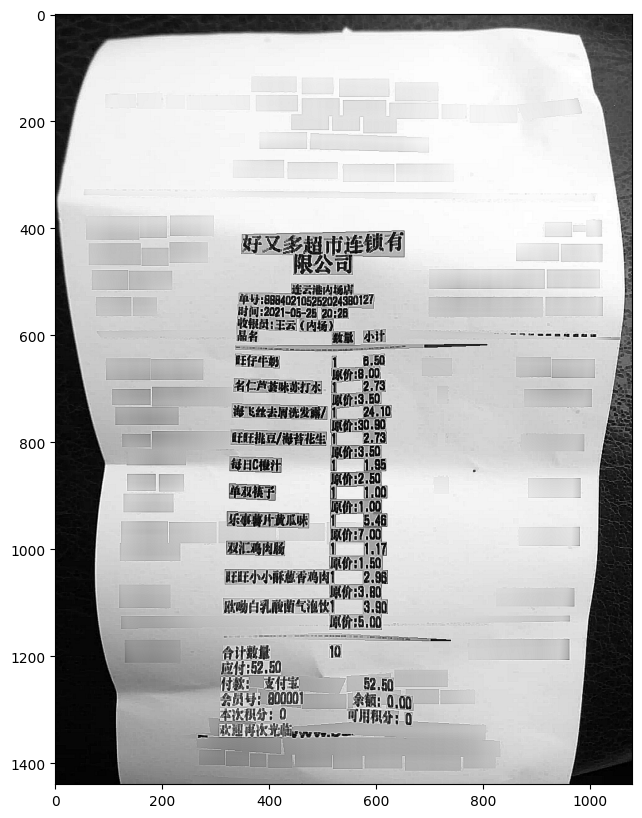

In [244]:
img_background = synthetic_preprocess(language='vietnamese', id=22)
img_document = synthetic_preprocess(language='chinese', id=22)

test_img,test_json = synthtic_receipts(img_background,img_document)
output1 = sharpening(test_img, strength=7)

output1 = output1.astype('uint8')
plt.figure(figsize=(10, 10))
plt.imshow(output1,cmap='gray')

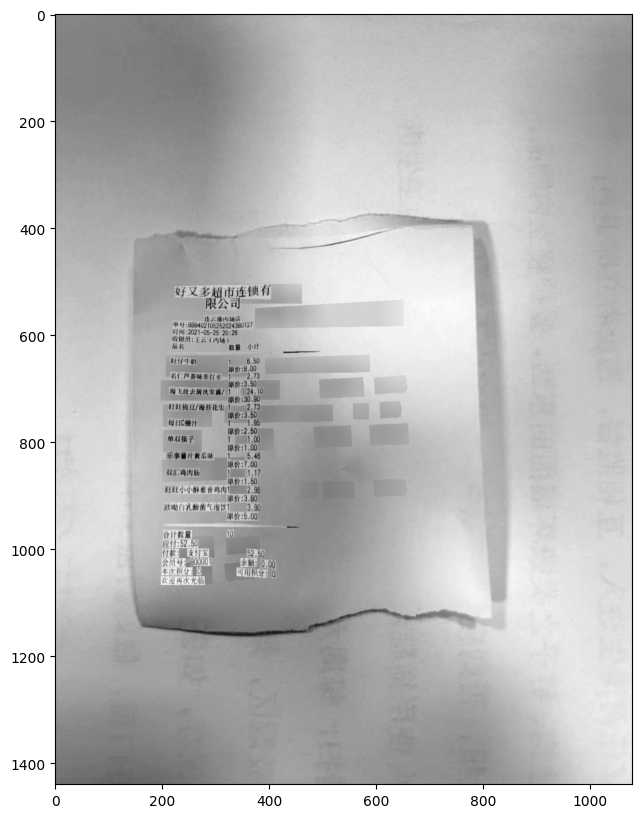

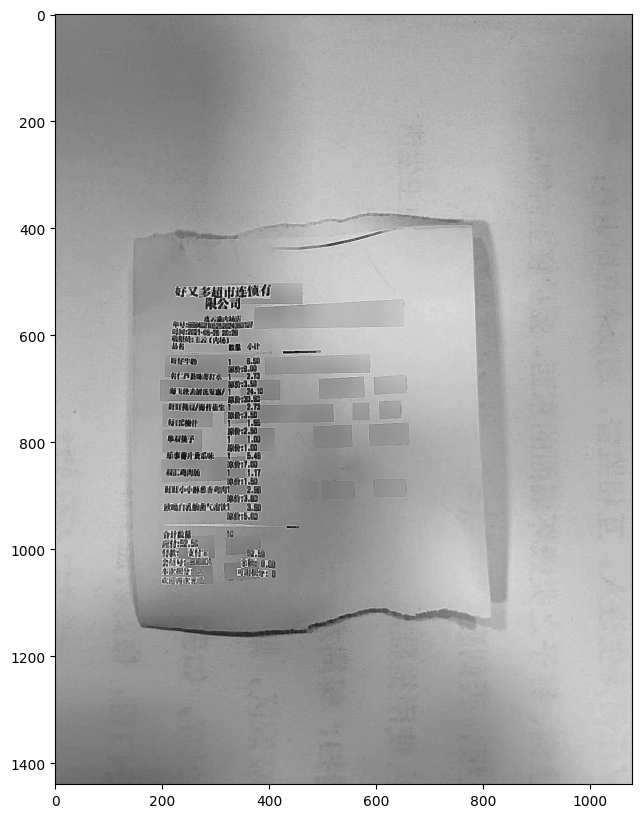

In [30]:
img_background = synthetic_preprocess(language='chinese', id=20)
img_document = synthetic_preprocess(language='chinese', id=22)

test_img,test_json = synthtic_receipts(img_background,img_document)
output1 = sharpening(test_img, strength=7)
output2 = sharpening(test_img, strength=17)

# view
visualize_img(test_img)
output1 = output1.astype('uint8')
plt.figure(figsize=(10, 10))
plt.imshow(output1,cmap='gray')

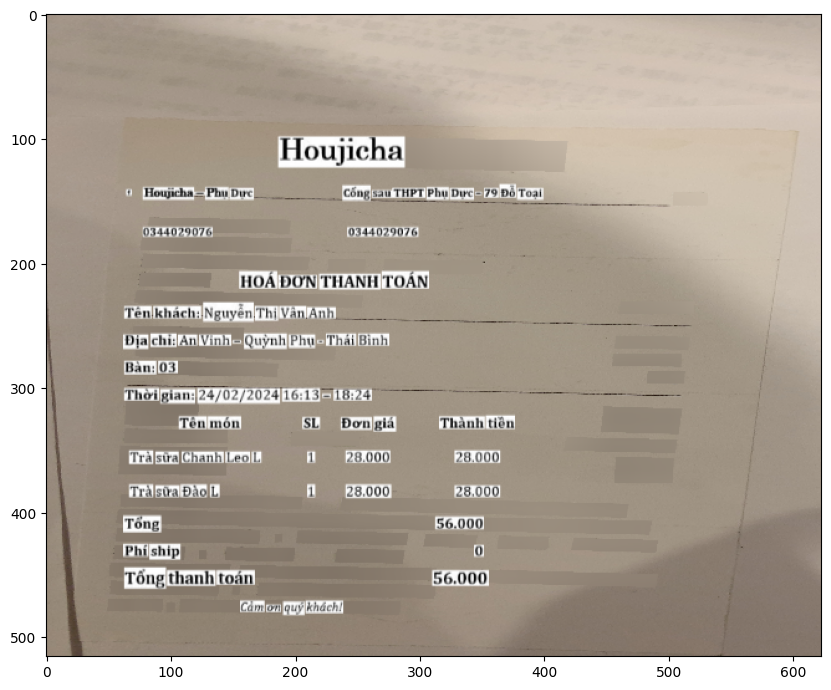

In [256]:
img_background = synthetic_preprocess(language='japanese', id=85)
img_document = synthetic_preprocess(language='vietnamese', id=85)

test_img,test_json = synthtic_receipts(img_background,img_document)
visualize_img(test_img)

In [268]:
json_p ='/data/ephemeral/home/code/data/japanese_receipt/ufo/synthetic.json'
with open(json_p, 'r') as json_file:
    test_json = json.load(json_file)
test_img = cv2.imread('/data/ephemeral/home/code/data/japanese_receipt/img/synthetic/output_74.jpg')
test_json = test_json['images']['output_74.jpg']

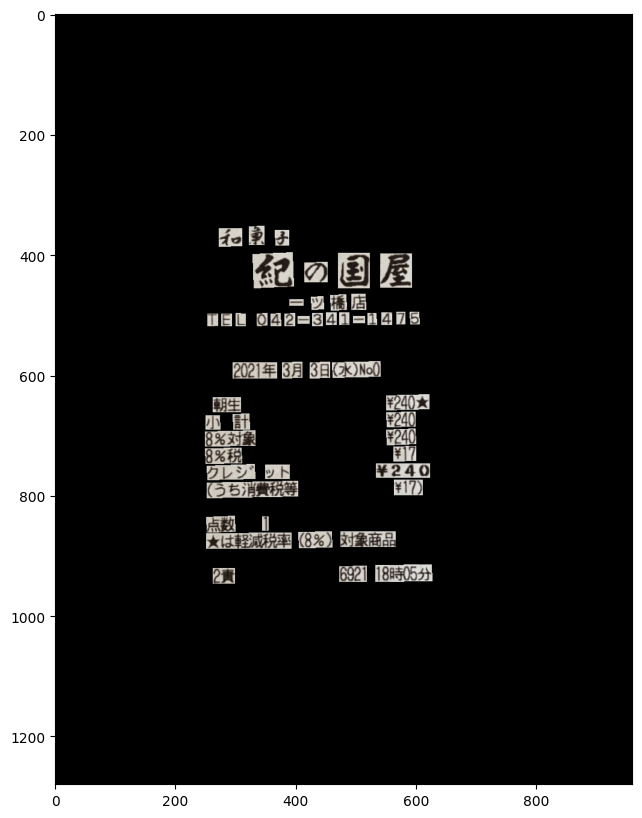

In [269]:
points_list = []
for word in test_json['words'].keys():
    points = test_json['words'][word]['points']
    points_list.append(points)

mask = np.zeros(test_img.shape[:2])
img_mask = cv2.fillPoly(mask,np.int32(points_list),1).copy()

visualize_img(test_img*np.expand_dims(img_mask,axis=-1))

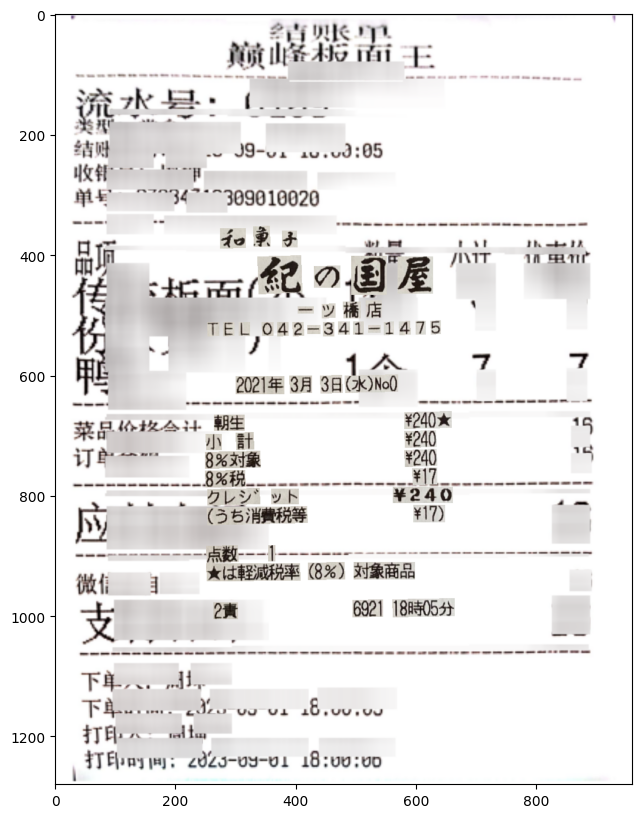

In [ ]:
def synthetic_preprocess(img_file, json_file):
    img = cv2.imread(img_file)
    image_name = img_file.split('/')[-1]
    points_list = []
    for word in json_file['images'][image_name]['words'].keys():
        points = json_file['images'][image_name]['words'][word]['points']
        points_list.append(points)

    x_lim = np.clip(np.array(points_list).reshape(-1,2)[:,0],a_min=0,a_max=img.shape[1])
    y_lim = np.clip(np.array(points_list).reshape(-1,2)[:,1],a_min=0,a_max=img.shape[0])

    xy_lim = np.stack([x_lim,y_lim],axis=1)
    poly_list = xy_lim.reshape(-1,4,2)

    x2 = xy_lim.max(axis=0)[0]
    y2 = xy_lim.max(axis=0)[1]
    x1 = xy_lim.min(axis=0)[0]
    y1 = xy_lim.min(axis=0)[1]

    image_json = json_file['images'][image_name]
    return img, poly_list, [x1,y1,x2,y2], image_json

id = 74
back_lang = 'chinese'
lang = 'japanese'

image_files = image_files_list[languages.index(lang)]
j_f = json_files_list[languages.index(lang)].copy()

back_image_files = image_files_list[languages.index(back_lang)]
back_jf = json_files_list[languages.index(back_lang)]

try:
    img_background = synthetic_preprocess(back_image_files[id],back_jf)
except:
    print('fail')
    img_background = synthetic_preprocess(image_files[id],j_f)

img_document = synthetic_preprocess(image_files[id],j_f)
image, json_f = synthtic_receipts(img_background,img_document)

#img_background1 = synthetic_preprocess(back_image_files[id],back_jf)
visualize_img(image)

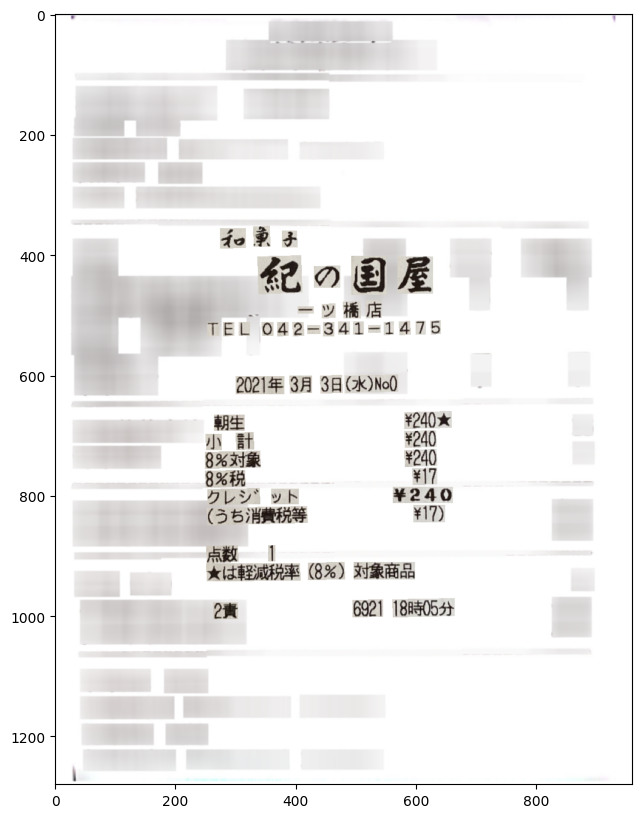

In [ ]:
def synthetic_preprocess(language,id):
    data_path = '/data/ephemeral/home/code/data/'
    json_path = data_path + language +'_receipt/ufo/' + 'train' + '.json'
    image_files = glob.glob(data_path + language +'_receipt/img/' + 'train' + '/*.jpg')

    img = cv2.imread(image_files[id])
    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    image_name = image_files[id].split('/')[-1]
    points_list = []
    for word in jf['images'][image_name]['words'].keys():
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)

    x_lim = np.clip(np.array(points_list).reshape(-1,2)[:,0],a_min=0,a_max=img.shape[1])
    y_lim = np.clip(np.array(points_list).reshape(-1,2)[:,1],a_min=0,a_max=img.shape[0])

    xy_lim = np.stack([x_lim,y_lim],axis=1)
    poly_list = xy_lim.reshape(-1,4,2)

    x2 = xy_lim.max(axis=0)[0]
    y2 = xy_lim.max(axis=0)[1]
    x1 = xy_lim.min(axis=0)[0]
    y1 = xy_lim.min(axis=0)[1]

    image_json = jf['images'][image_name]
    return img, poly_list, [x1,y1,x2,y2], image_json

img_background = synthetic_preprocess(language='chinese', id=92)
img_document = synthetic_preprocess(language='japanese', id=74)

test_img,test_json = synthtic_receipts(img_background,img_document)
visualize_img(test_img)

In [ ]:
import random
import os
import copy

languages = ['chinese','japanese','thai','vietnamese']
image_files_list = []
json_files_list = []

for lang in languages:
    data_path = '/data/ephemeral/home/code/data/'
    json_path = data_path + lang +'_receipt/ufo/' + 'train.json'
    image_files = glob.glob(data_path + lang +'_receipt/img/' + 'train' + '/*.jpg')
    image_files_list.append(image_files)

    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    json_files_list.append(jf)

for lang in languages:
    output_dir = data_path + lang + '_receipt/img/synthetic'
    os.makedirs(output_dir,exist_ok=True)
    new_json={'images':{}}
    new_json_path = data_path + lang +'_receipt/ufo/' + 'synthetic.json'

    change_language = languages.copy()
    image_files = image_files_list[languages.index(lang)]
    j_f = copy.deepcopy(json_files_list[languages.index(lang)])
    change_language.remove(lang)

    for id in range(len(image_files)):
        back_lang = random.choice(change_language)
        back_image_files = image_files_list[languages.index(back_lang)]
        back_jf = copy.deepcopy(json_files_list[languages.index(back_lang)])
        try:
            img_background = synthetic_preprocess(back_image_files[id],back_jf)
        except:
            print('fail')
            img_background = synthetic_preprocess(image_files[id],j_f)

        img_document = synthetic_preprocess(image_files[id],j_f)
        image, json_f = synthtic_receipts(img_background,img_document)

        # 이미지 저장 (필요한 경우 주석 해제)
        output_path = os.path.join(output_dir, f'output_{id}.jpg')
        cv2.imwrite(output_path, image)

         

        with open(new_json_path, 'w') as new_json_file:
            json.dump(new_json, new_json_file, indent=4)
        

    print(lang + " finish")
print("All images processed")

AttributeError: 'dict' object has no attribute 'deepcopy'